In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
# slam 视频
cap = cv2.VideoCapture("./images/c.mp4")
frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
h_ = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
w_ = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
gray_video = np.zeros((frame_num, h_, w_),dtype=np.uint8)
int(cap.get(7))
count = 0
for i in range(frame_num):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_video[count] = gray
    count += 1

In [12]:
chessboard_size = (11, 8)
chessboard_cell_size = (60, 60)
# extract object points and image points
objp = np.zeros((chessboard_size[0]*chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0],
                       0:chessboard_size[1]].T.reshape(-1, 2)*60

# Arrays to store object points and image points from all the images.
objpoints = []
imgpoints = []


for i in range(20):
    # 寻找棋盘格角点的模式 自适应阈值+标准化图片
    chessboard_flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE

    ret, corners = cv2.findChessboardCorners(
        gray_video[i*30], chessboard_size, chessboard_flags)
    # 若未找到角点则退出
    if ret is not True:
        continue

    # 进一步优化角点坐标
    criteria = (cv2.TERM_CRITERIA_MAX_ITER +
                cv2.TERM_CRITERIA_EPS, 30, 0.001)
    corners = cv2.cornerSubPix(
        gray_video[i], corners, (11, 11), (-1, -1), criteria)

# calibrate
img = cv2.imread('images/corners_0.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given objects points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, img_size, None, None)


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\calibration.cpp:3694: error: (-215:Assertion failed) nimages > 0 in function 'cv::calibrateCameraRO'


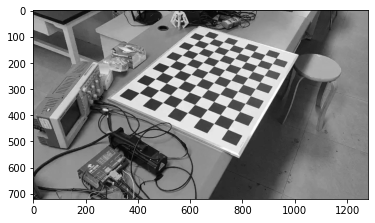

In [15]:
plt.imshow(gray_video[0],'gray')